In [2]:
import ast
import copy
import os
import sys

In [5]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score
from torch.utils.data import DataLoader
from torchvision import transforms as T
from tqdm import tqdm_notebook as tqdm
import albumentations as A

In [6]:
sys.path.append('src')
from dataset import BengaliDatasetTrain

In [14]:
def show_imgs(dataset, nrow=5, ncol=5, figsize=(20, 8)):
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        image = np.array(dataset[i]['image']).astype(np.uint8)
        ax.imshow(image, cmap='Greys')
    plt.tight_layout()
    plt.show()

def alb_to_transform(alb):
    def f(img):
        return alb(image=np.array(img))['image']
    return f

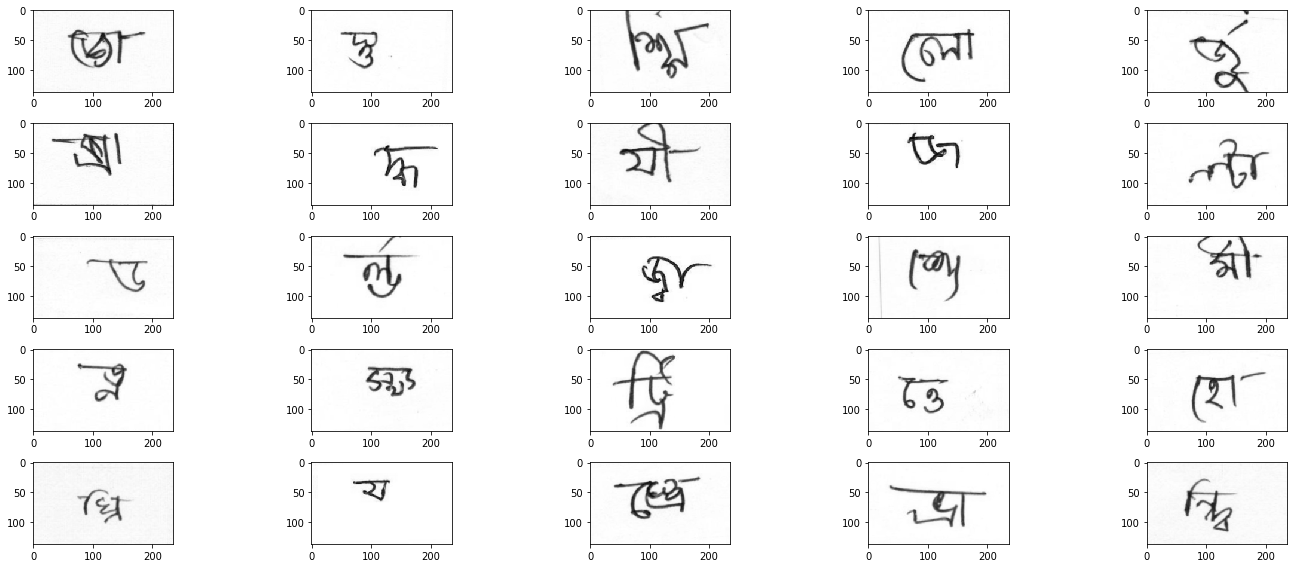

In [21]:
show_imgs(BengaliDatasetTrain(folds=(0, 1, 2, 3, 4), transform=alb_to_transform(aug)))

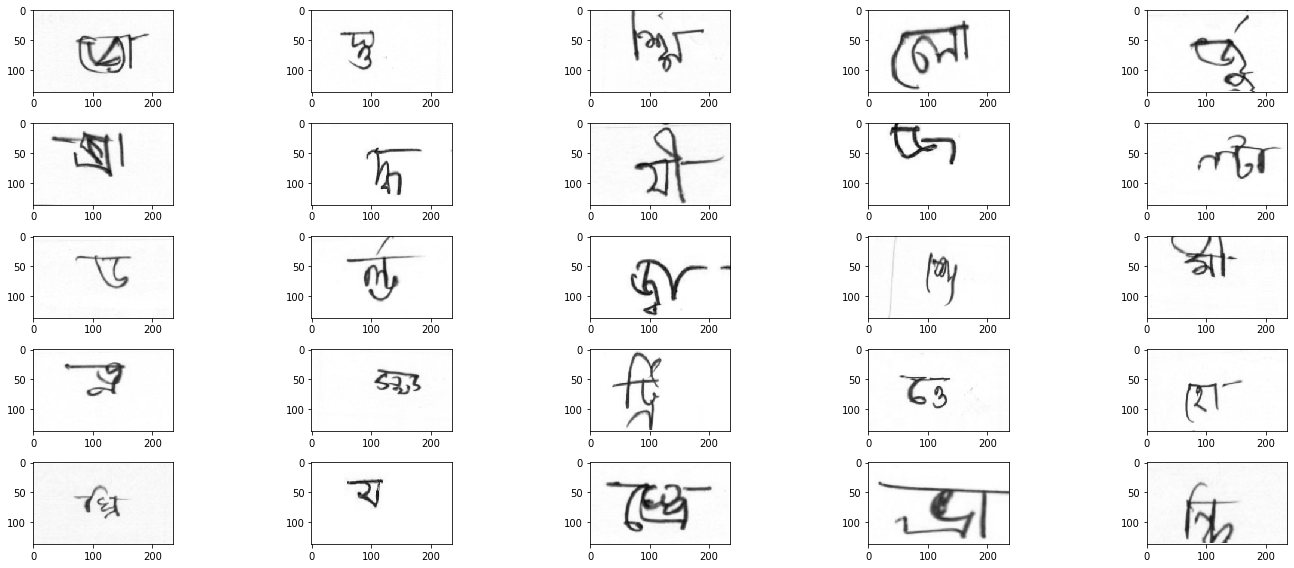

In [37]:
aug = A.Compose([
    A.ShiftScaleRotate(
        shift_limit=0.0625,
        scale_limit=0.2,
        rotate_limit=5,
        p=0.9
    ),
    A.GridDistortion(num_steps=5, distort_limit=0.4, p=1)
])

dataset = BengaliDatasetTrain(folds=(0, 1, 2, 3, 4), transform=alb_to_transform(aug))
show_imgs(dataset)